# Compare results using the plotter {#compare_results}

This example shows how to plot several mesh/result combinations on the
same plot so that you can compare results at different time steps.


In [1]:
from ansys.dpf import core as dpf
from ansys.dpf.core import examples
from ansys.dpf.core.plotter import DpfPlotter

# Compare two results

Use the `ansys.dpf.core.plotter.DpfPlotter`{.interpreted-text
role="class"} class to plot two different results over the same mesh and
compare them.


In [2]:
# Here we create a Model and request its mesh
model = dpf.Model(examples.find_msup_transient())
mesh_set2 = model.metadata.meshed_region

# Then we need to request the displacement for two different time steps
displacement_operator = model.results.displacement()
displacement_operator.inputs.time_scoping.connect([2, 15])
displacement_set2 = displacement_operator.outputs.fields_container()[0]
displacement_set15 = displacement_operator.outputs.fields_container()[1]

Use the `ansys.dpf.core.plotter.DpfPlotter`{.interpreted-text
role="class"} class to add plots for the first mesh and the first
result.


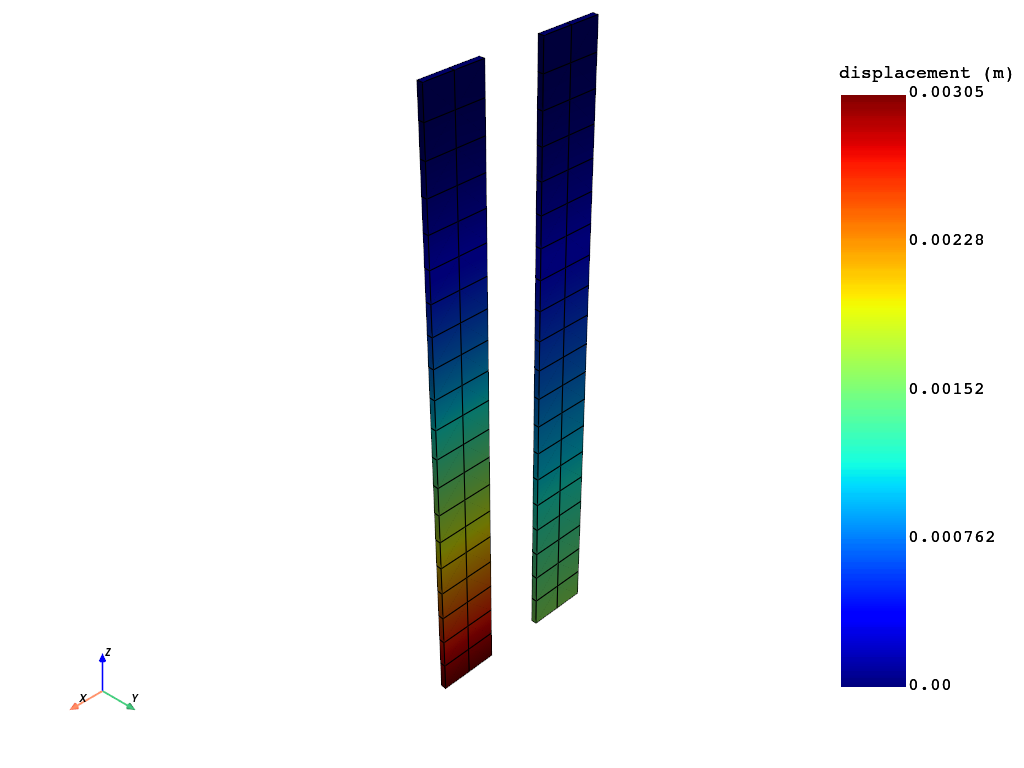

In [3]:
pl = DpfPlotter()
pl.add_field(displacement_set2, mesh_set2)

# Create a new mesh and translate it along the x axis.
mesh_set15 = mesh_set2.deep_copy()
overall_field = dpf.fields_factory.create_3d_vector_field(1, dpf.locations.overall)
overall_field.append([0.2, 0.0, 0.0], 1)
coordinates_to_update = mesh_set15.nodes.coordinates_field
add_operator = dpf.operators.math.add(coordinates_to_update, overall_field)
coordinates_updated = add_operator.outputs.field()
coordinates_to_update.data = coordinates_updated.data

# Use the :class:`ansys.dpf.core.plotter.DpfPlotter` class to add plots for the
# second mesh and the second result.
pl.add_field(displacement_set15, mesh_set15)
pl.show_figure(show_axes=True)